# Regression Predictive Modeling on Boston House Prices Dataset

In this project, house prices will be predicted given explanatory variables that cover many aspects of residential houses. The goal of this project is to create a regression model that is able to accurately estimate the price of the house with given features. I got the Dataset from Kaggle. This Dataset consist several features such as Number of Rooms, Crime Rate, pupil-reacher ratio by town and Tax and so on.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
# The target variable, ‘MEDV’, will be the variable i seek to predict
# Here lets change 'MEDV' column name to 'Price'

df.rename(columns={'MEDV':'Price'},inplace=True)

In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

## Exploratory Data Analysis (EDA)

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

Details about data features

•	**CRIM:** per capita crime rate by town

•	**ZN:** proportion of residential land zoned for lots over 25,000 sq.ft.

•	**INDUS:** proportion of non-retail business acres per town

•	**CHAS:** charles river dummy variable (= 1 if tract bounds river; 0 otherwise)

•	**NOX:** nitric oxides concentration (parts per 10 million)

•	**RM:** average number of rooms per dwelling

•	**AGE:** proportion of owner-occupied units built prior to 1940

•	**DIS:** weighted distances to five boston employment centres

•	**RAD:** index of accessibility to radial highways

•	**TAX:** full-value property tax rate per $10,000 .

•	**PTRATIO:** pupil-teacher ratio by town

•	**B:** 1000(Bk-0.63)2 where Bk is the proportion of blacks by town

•	**LSTAT:** % lower status of the population

•	**MEDV:** median value of owner-occupied homes in $1000’s




In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (506, 14)


Dataset comprises of 506 observations and 14 characteristics.Out of which one is dependent variable and rest 13 are independent variables.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Data has only float and integer values. Some variable columns has null/missing values.

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


There is notably a large difference between 75th % tile and max values of predictors "CRIM" and "ZN".

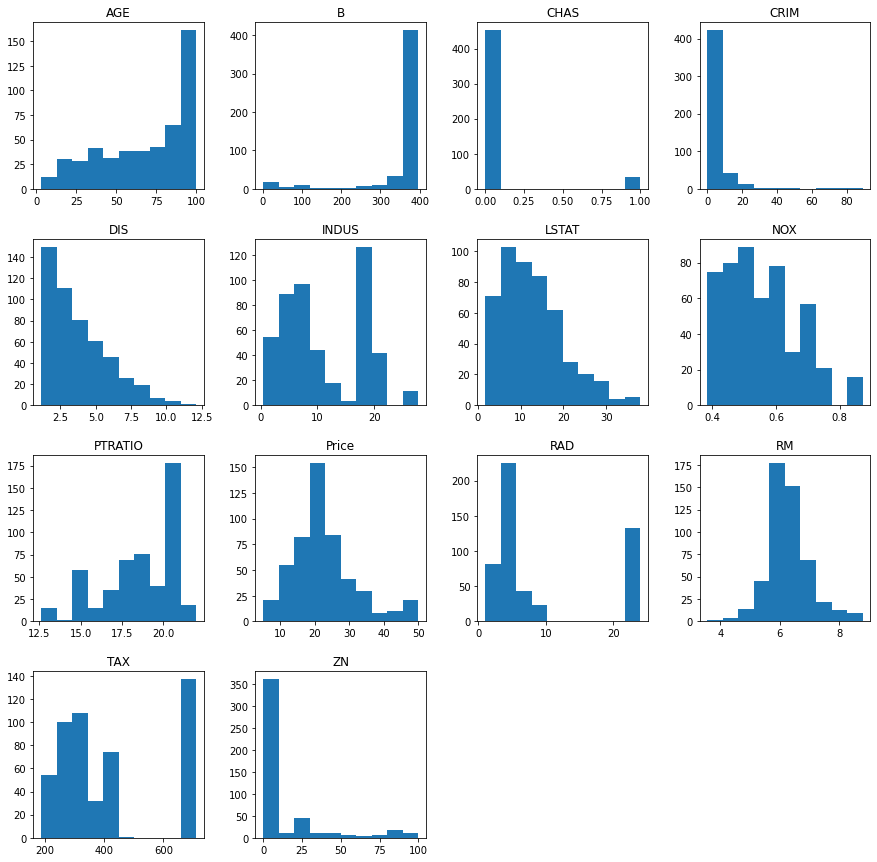

In [9]:
# Data visualizations

# histograms
df.hist(bins=10,figsize=(15,15),grid=False);

### Logical analysis of expected relationships between features and price:

**CRIM - per capita crime rate by town**

As crime rate increases, a neighbourhood becomes less inhabitable, which will drive down housing demand and pricing. Hence, I expect an inverse linear or inverse sigmoid relationship between crime rate and price.

**INDUS - proportion of non-retail business acres per town**

Non-retail businesses would mean factories or warehouses, which are typically located further out from central, with cheaper land. So I would think that this have an inverse relationship with housing price.

**CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)**

I would think it's good to be close to the river, to be able to walk or jog along it. Hence a positive relationship, but I think this is a subjective one.

**NOX - nitric oxides concentration (parts per 10 million)**

Nitric oxide is a pollutant, hence I would expect a neighbourhood with high level of nitric oxide to have lower housing demand and housing.

**RM - average number of rooms per dwelling**

In general, more rooms mean the house is bigger. Hence, I expect a positive relationship with housing price.

**AGE - proportion of owner-occupied units built prior to 1940**

In general, the newer a house the better, hence I expect a positive relationship. However, there may be old antique houses that would fetch high prices.

**DIS - weighted distances to five Boston employment centres**

Not exactly sure how relevant the distance to employment centres is, because if people are employed, they probably don't care if the centres are far away. Going along that line of reasoning, if could be that only people who are unemployed value them more. Hence I would guess this variable is either irrelevant or have inverse relationship with housing price.

**RAD - index of accessibility to radial highways**

People value accessibility, as it is convenient and saves time, so this should have a positivel relationship with price.

**TAX - full-value property-tax rate per $10,000**

More expensive properties should have higher tax rate, so this should be positive relationship.

**PTRATIO - pupil-teacher ratio by town**

Lower PT ratio means each pupil gets more teacher attention. Hence, I expect lower PT ratio to correspond to education quality, which in turn has positive relationship with housing price.

**LSTAT - % lower status of the population**

In general, status is positively correlated to income, which is positively correlated with housing price. Hence the higher the proportion of lower status, the lower the housing price.

Through analysis I concluded that the following variables can play an important role in this problem:

**CRIM, INDUS, NOX, RM, AGE, RAD, TAX, PTRATIO and LSTAT.**

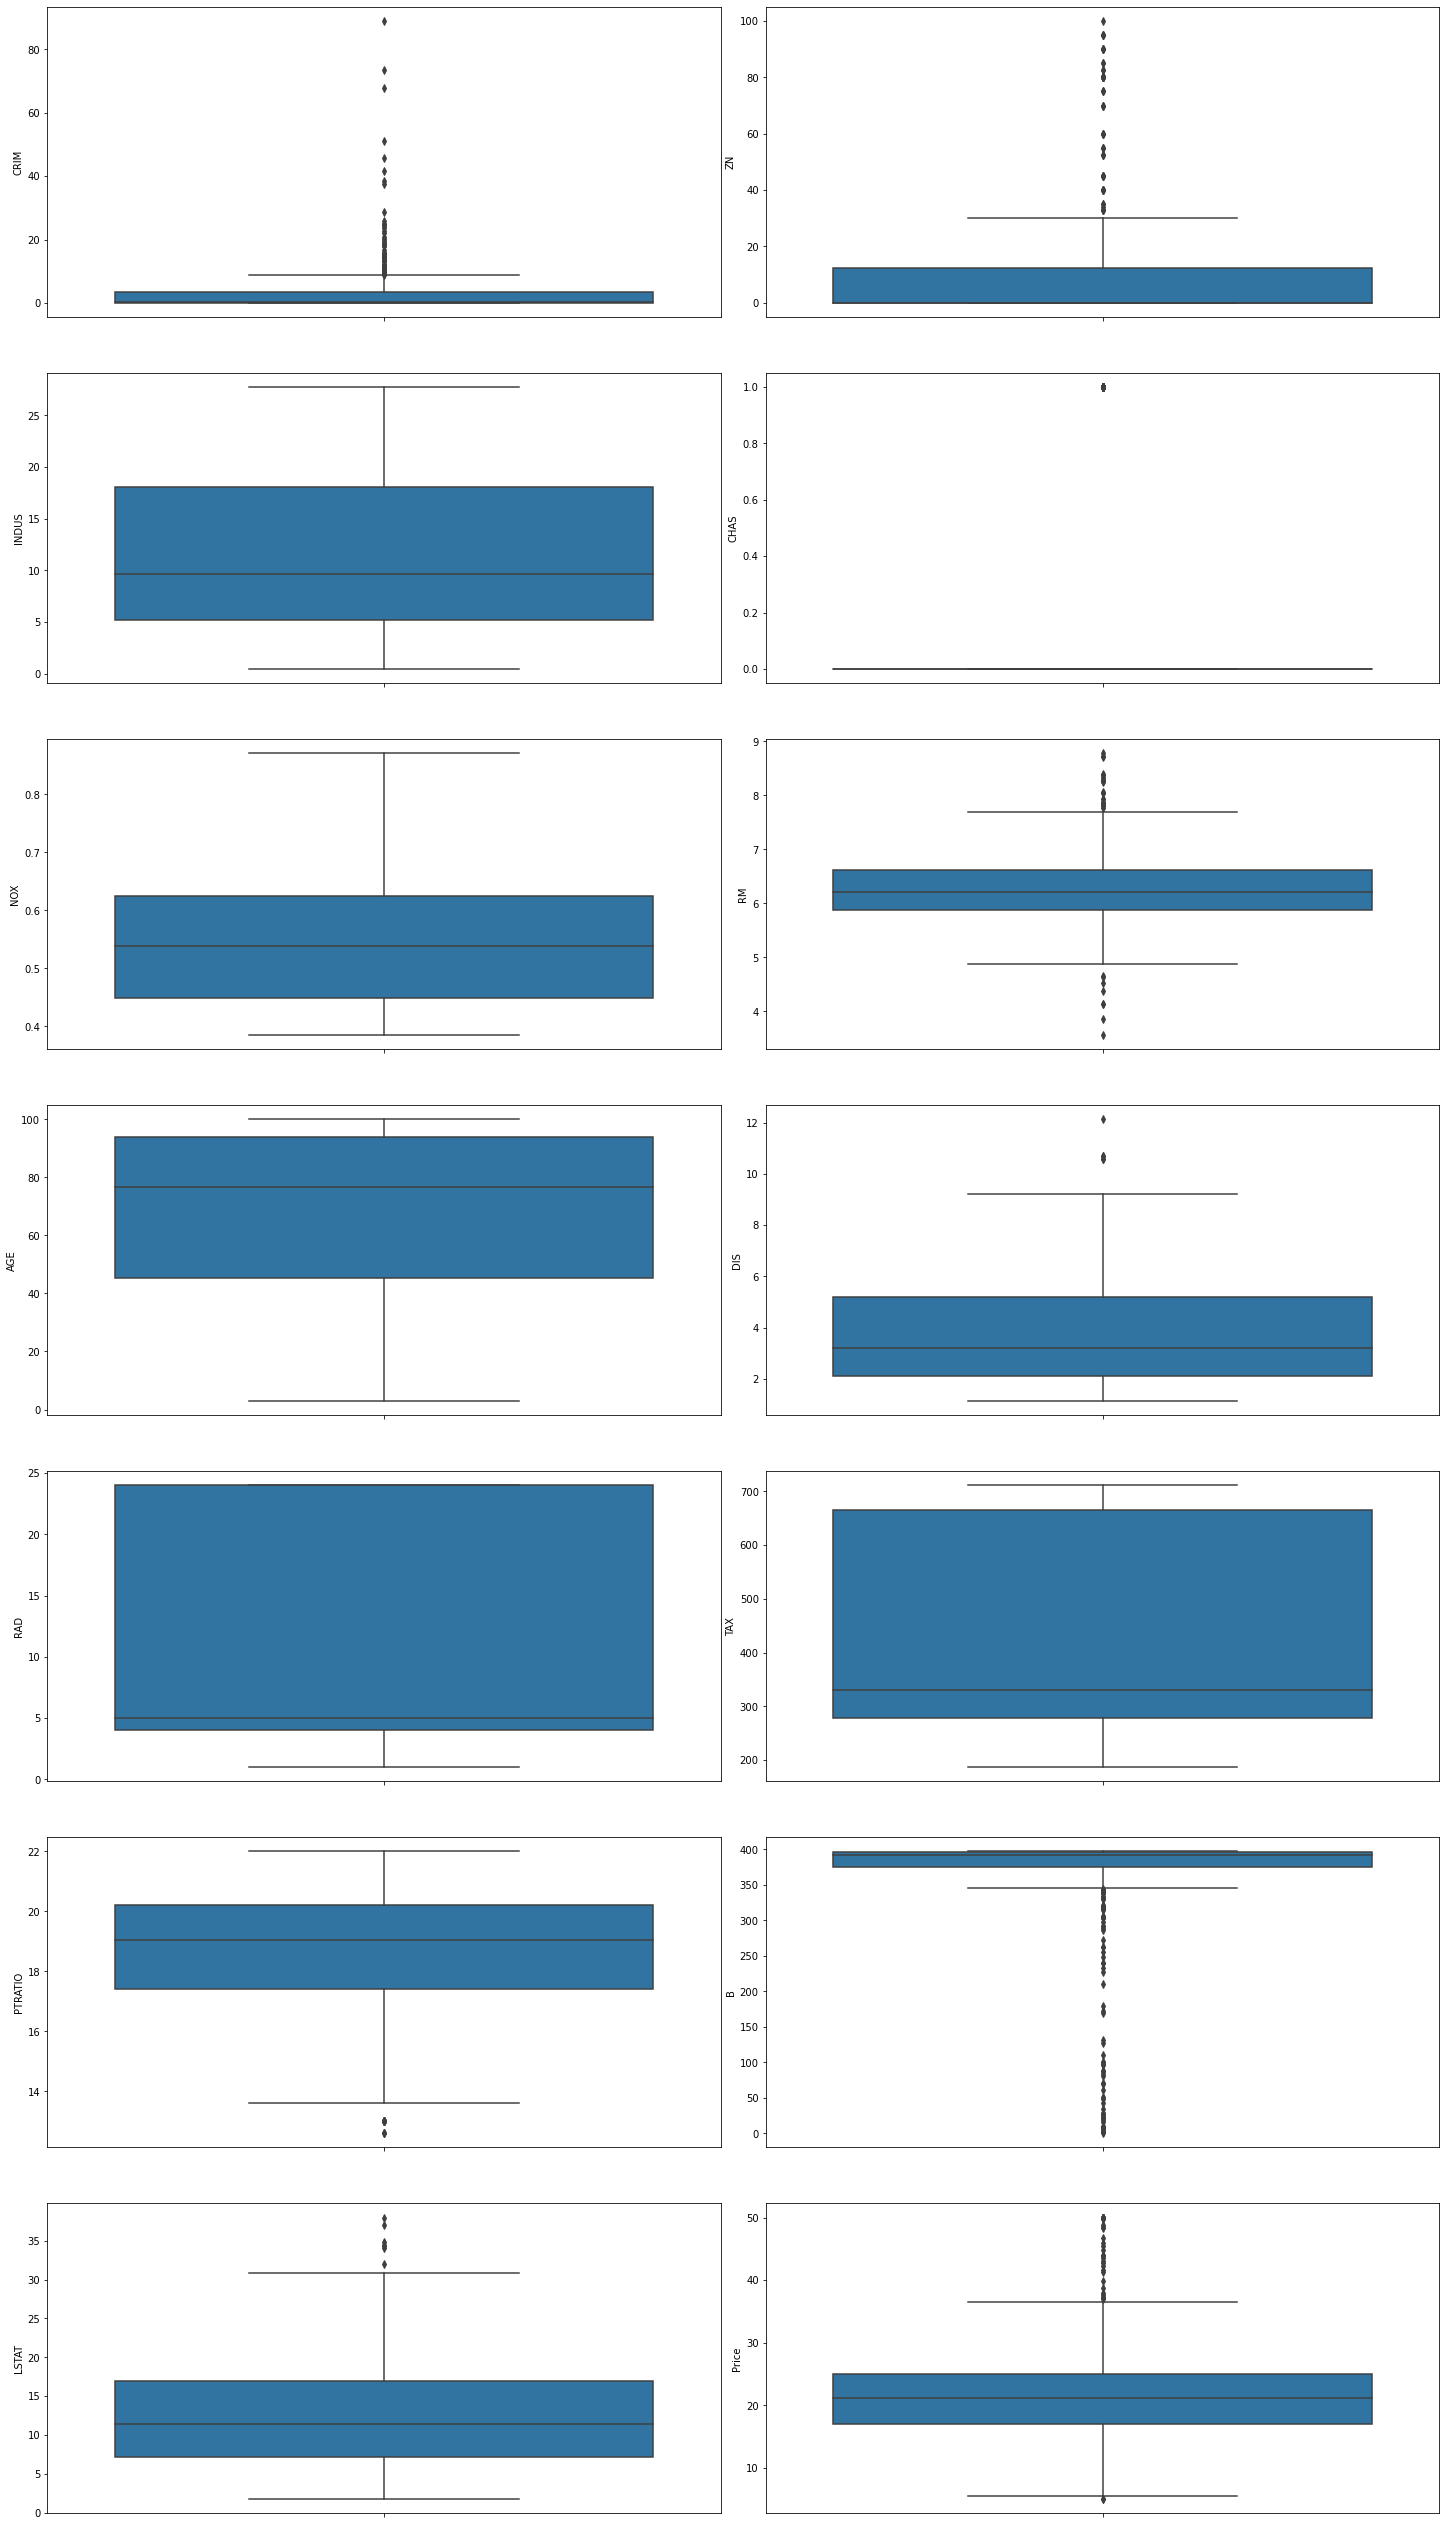

In [10]:
from scipy import stats

fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(20, 35))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

In [11]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 12.85%
Column ZN outliers = 12.45%
Column INDUS outliers = 0.00%
Column CHAS outliers = 96.05%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column Price outliers = 7.91%



### Analyzing target variable Price

In [12]:
#descriptive statistics summary
df['Price'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: Price, dtype: float64

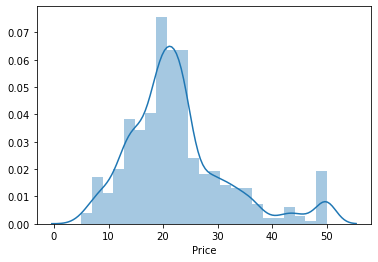

In [13]:
#histogram
sns.distplot(df['Price']);

In [14]:
#skewness and kurtosis
print("Skewness: %f" % df['Price'].skew())
print("Kurtosis: %f" % df['Price'].kurt())

Skewness: 1.108098
Kurtosis: 1.495197


Target variable(Price) have appreciable positive skewness and deviate from the normal distribution.
Distribution is shorter, tails are thinner than the normal distribution. The peak is lower and broader than Mesokurtic, which means that data are light-tailed or lack of outliers.

**Relationship of target variable with other variables**

Text(0, 0.5, 'Price')

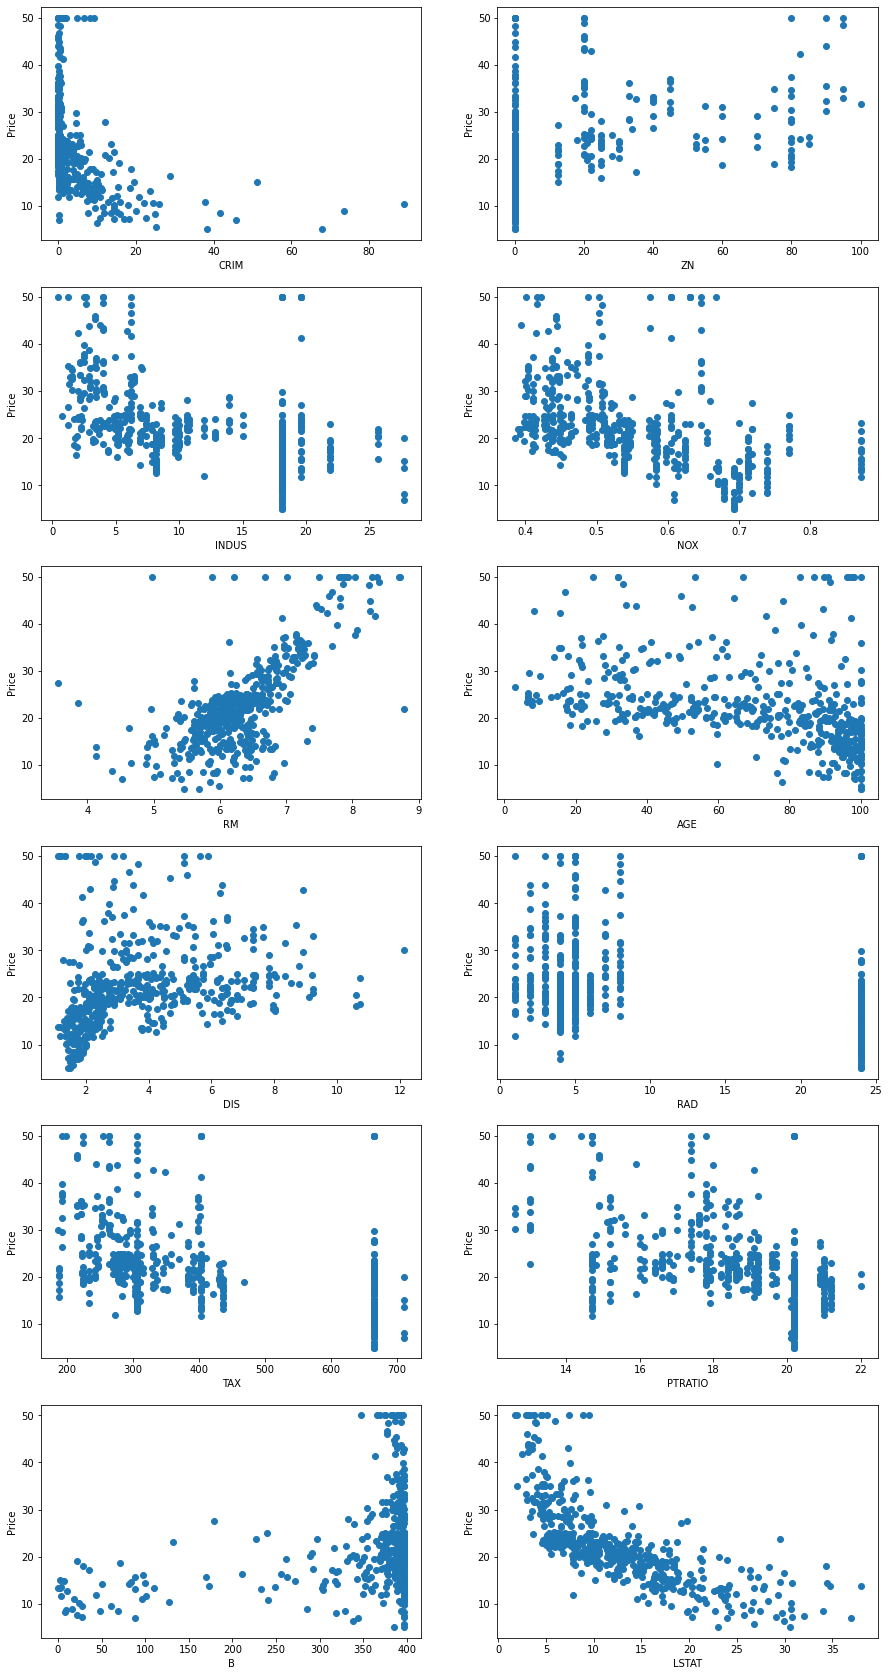

In [15]:
# scatter plots between independent variables and Price (target variable)

fig, axs = plt.subplots(6, 2,figsize=(15,30))
axs[0, 0].scatter(df['CRIM'],df['Price'])
axs[0, 0].set_xlabel('CRIM')
axs[0, 0].set_ylabel('Price')

axs[0, 1].scatter(df['ZN'],df['Price'])
axs[0, 1].set_xlabel('ZN')
axs[0, 1].set_ylabel('Price')

axs[1, 0].scatter(df['INDUS'],df['Price'])
axs[1, 0].set_xlabel('INDUS')
axs[1, 0].set_ylabel('Price')

axs[1, 1].scatter(df['NOX'],df['Price'])
axs[1, 1].set_xlabel('NOX')
axs[1, 1].set_ylabel('Price')

axs[2, 0].scatter(df['RM'],df['Price'])
axs[2, 0].set_xlabel('RM')
axs[2, 0].set_ylabel('Price')

axs[2, 1].scatter(df['AGE'],df['Price'])
axs[2, 1].set_xlabel('AGE')
axs[2, 1].set_ylabel('Price')

axs[3, 0].scatter(df['DIS'],df['Price'])
axs[3, 0].set_xlabel('DIS')
axs[3, 0].set_ylabel('Price')

axs[3, 1].scatter(df['RAD'],df['Price'])
axs[3, 1].set_xlabel('RAD')
axs[3, 1].set_ylabel('Price')

axs[4, 0].scatter(df['TAX'],df['Price'])
axs[4, 0].set_xlabel('TAX')
axs[4, 0].set_ylabel('Price')

axs[4, 1].scatter(df['PTRATIO'],df['Price'])
axs[4, 1].set_xlabel('PTRATIO')
axs[4, 1].set_ylabel('Price')

axs[5, 0].scatter(df['B'],df['Price'])
axs[5, 0].set_xlabel('B')
axs[5, 0].set_ylabel('Price')

axs[5, 1].scatter(df['LSTAT'],df['Price'])
axs[5, 1].set_xlabel('LSTAT')
axs[5, 1].set_ylabel('Price')

Looking at these plots, it appears that some variables have no useful relationship against Price. Let's verify that by feature selection.


## Feature Selection

Feature Selection is the process where we select those features which contribute most to our prediction variable or output in which we are interested in. Having irrelevant features in our data can decrease the accuracy of the models and make our model learn based on irrelevant features.

**Finding out the correlation between the features**

In [16]:
#Generating the correlation matrix
corr = df.corr()
corr.shape

(14, 14)

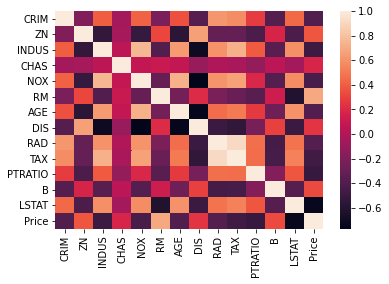

In [17]:
# Generating the correlation heat-map
sns.heatmap(corr)

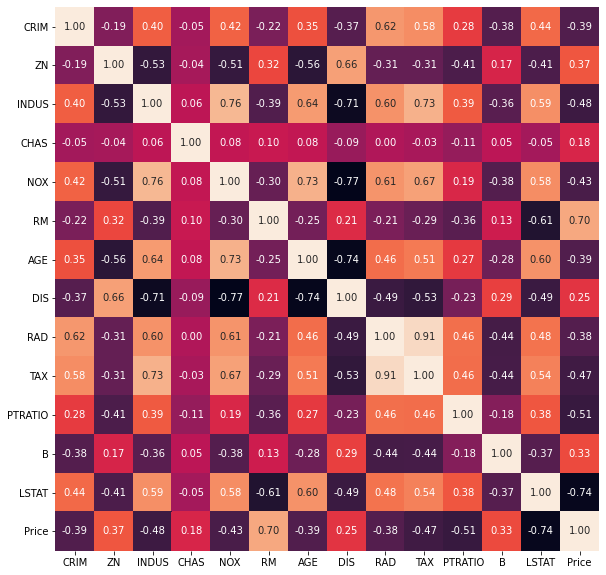

In [18]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,10))
sns.heatmap(corr, cbar=False, square= True, fmt='.2f', annot=True)

To fit a regression model, we select those features which have a high correlation with our target variable Price. By looking at the correlation matrix i can see that RM has a strong positive correlation with Price (0.70) where as LSTAT has a high negative correlation with Price(-0.74).

An important point in selecting features for a regression model is to check for multi-co-linearity. The features RAD and TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model.

Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable

**Summary from correlation matrix:**

**RM** and **LSTAT** are strongly correlated with **Price**.

**PTRATIO** is also highly correlated with **Price**.

**CHAS** and **DIS** are poorly correlated with **Price**.

**RAD** and **TAX** have correlation 0.91 with each other which means selecting both feature will lead to Multicollinearity.

while CRIM, ZN, INDUS, NOX, AGE, DIS, RAD, TAX, B have less than abs(0.5) correlation. 

**Therefore by above anlaysis RM, LSTAT ans PTRATIO are found to be best features for target variable(Price). So i will only use them for my further analysis.**


## Data Preprocessing

### Missing Data

Data can have missing values for a number of reasons such as observations that were not recorded and data corruption. Handling missing data is important as many machine learning algorithms do not support data with missing values. Having missing values in a dataset can cause errors with some machine learning algorithms. The simplest strategy for handling missing data is to remove records that contain a missing value.

In [19]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
LSTAT,20,0.039526
AGE,20,0.039526
CHAS,20,0.039526
INDUS,20,0.039526
ZN,20,0.039526
CRIM,20,0.039526
Price,0,0.000000
B,0,0.000000
PTRATIO,0,0.000000
TAX,0,0.000000


I have 20 missing observation in CRIM, ZN, INDUS, CHAS, AGE and LSTAT. Since it is just 20 observation which is about 0.039 %, I'll delete those 20 observation. As i am considering only RM, LSTAT and PTRATIO for my analysis i will delete 20 observations of LSTAT and drop other variables.

In [20]:
#dealing with missing data
df = df.drop(df.loc[df['LSTAT'].isnull()].index)

# dropping other unnecessary variables
df.drop(df.columns[[0, 1, 2, 3, 4, 6, 7, 8, 9, 11]], axis = 1, inplace = True)

In [21]:
#just checking that there's no missing data missing...
df.isnull().sum()

RM         0
PTRATIO    0
LSTAT      0
Price      0
dtype: int64

In [22]:
df.shape

(486, 4)

Number of rows has been cut from 506 in the original dataset to 486 with all null/missing values removed and after selecting necessary features. The new shape of my dataset is (486,4).

**Multivariate analysis**

Using a scatter plot let’s see how "RM", "LSTAT" and "PTRATIO" vary with Price.

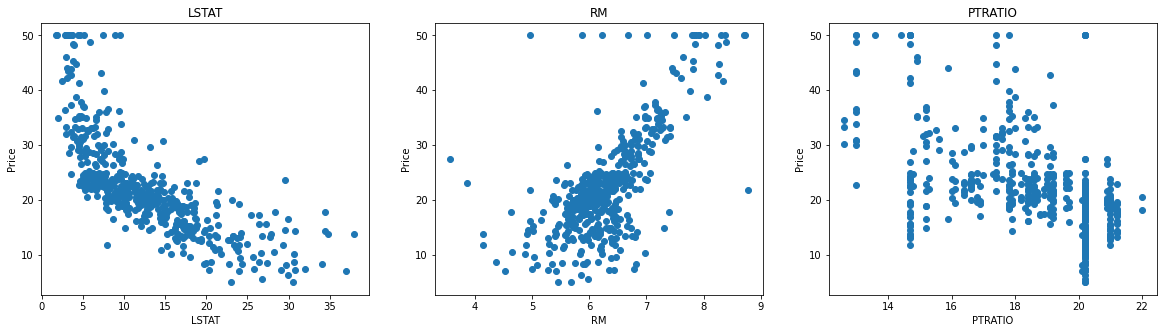

In [23]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'PTRATIO']
target = df['Price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')

The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50. The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

Outliers is a complex subject and it deserves more attention. Here, i'll just do a quick analysis through the standard deviation of 'Price' and a set of scatter plots.

**Univariate analysis**

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, i will standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [24]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df['Price'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.89704594]
 [-1.89704594]
 [-1.83181954]
 [-1.75572207]
 [-1.6796246 ]
 [-1.6796246 ]
 [-1.65788247]
 [-1.65788247]
 [-1.65788247]
 [-1.63614033]]

outer range (high) of the distribution:
[[2.99493425]
 [2.99493425]
 [2.99493425]
 [2.99493425]
 [2.99493425]
 [2.99493425]
 [2.99493425]
 [2.99493425]
 [2.99493425]
 [2.99493425]]


Low range values are not similar and not too far from 0.
High range values are similar and far from 0.



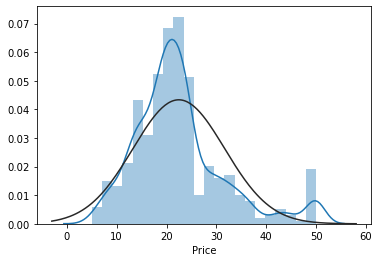

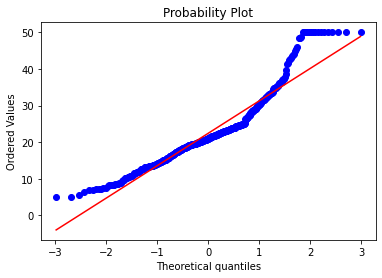

In [25]:
#histogram and normal probability plot
sns.distplot(df['Price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)

'Price' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

A simple data transformation can solve the problem. In case of positive skewness, log transformations usually works well.

In [26]:
#applying log transformation
df['Price'] = np.log(df['Price'])

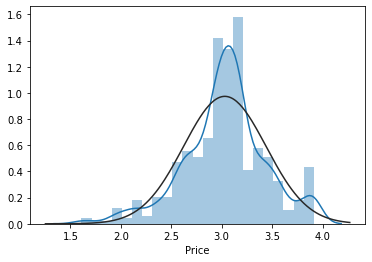

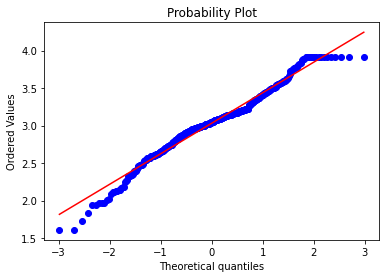

In [27]:
#transformed histogram and normal probability plot
sns.distplot(df['Price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)

I first split the data into training and test sets, then apply scaling to transform all feature values to fall between 0 and 1. Scaling features is important to allow model training methods such as gradient descent to converge more quickly. 

I will be using r2_score, mean absolute error and root mean squared error as evaluation metrics to analyze my models.

MAE(Mean Absolute Error) is a very simple metric which calculates the absolute difference between actual and predicted values.
R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform.R2 squared is also known as Coefficient of Determination or sometimes also known as Goodness of fit.

In [28]:
# Evaluation Metrics library
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Shuffle and Split Data

Split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset. Training dataset is 80% and test data is 20%.

In [29]:
from sklearn.model_selection import train_test_split

# exclude data points with Price = 50, as i found it likely to be erroneous value
df = df[df['Price'] != 3.91202301]

# exclude Price which is the target variable
X = df.iloc[:,0:3]
Y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print('No. of training data:', len(X_train))
print('No. of test data:', len(X_test))

print("Training and testing split was successful.")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

No. of training data: 388
No. of test data: 98
Training and testing split was successful.
(388, 3)
(98, 3)
(388,)
(98,)


## Feature Scaling

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. Normalization scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision.  

I can apply the MinMaxScaler directly to normalize the input variables. I will use the default configuration and scale values to the range 0 and 1.

In [30]:
from sklearn.preprocessing import MinMaxScaler
# normalise and scale all features so that all feature values fall between 0 and 1
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled = scaler.transform(X_train)
imp = ['RM','PTRATIO','LSTAT']
feature_cols = list(imp)
for i, col in enumerate(feature_cols):
    X_train[col] = scaled[:,i]


scaled_test = scaler.transform(X_test)

print('Before scaling:')
display(X_test.head())

for i, col in enumerate(feature_cols):
    X_test[col] = scaled_test[:,i]

print('\nAfter scaling:')
display(X_test.head())

Before scaling:


,RM,PTRATIO,LSTAT
436,6.461,20.2,18.05
272,6.538,18.6,7.73
449,6.417,20.2,19.31
466,5.952,20.2,17.15
378,6.380,20.2,23.69



After scaling:


,RM,PTRATIO,LSTAT
436,0.555662,0.808511,0.450331
272,0.570416,0.638298,0.165563
449,0.547231,0.808511,0.485099
466,0.458134,0.808511,0.425497
378,0.540142,0.808511,0.605960


After Data Analysis, Data Preprocessing, Feature selection and Feature Scaling. Now i will start building different models.

## Model Building

### Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
# predictions
y_pred_linear = model.predict(X_test)

In [33]:
# Calculating Scores
from sklearn.model_selection import cross_val_score
cv_linear = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10,scoring='r2')
print("CV: ", cv_linear.mean())
score_train_linear = r2_score(y_train,model.predict(X_train))
print("R2 score (Train):",score_train_linear)
score_test_linear = r2_score(y_test, y_pred_linear)
print("R2 score (Test):",score_test_linear)
print("Model Performance:",score_test_linear*100)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print('Mean Squared Error : ',mse_linear )
print('Root Mean Squared Error : ',np.sqrt(mse_linear))
mae_linear = mean_absolute_error(y_test,y_pred_linear)
print("Mean Absolute Error : ",mae_linear)

CV:  0.6887396999037235
R2 score (Train): 0.706171394555472
R2 score (Test): 0.7346744540398777
Model Performance: 73.46744540398777
Mean Squared Error :  0.04183091006237494
Root Mean Squared Error :  0.2045260620614765
Mean Absolute Error :  0.14618534034800412


### Ridge Regression 

In [34]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=0.04, fit_intercept=True))
]

model = Pipeline(steps)
model.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=0.04))])

In [35]:
# predictions
y_pred_ridge = model.predict(X_test)

In [36]:
# Calculating Scores

from sklearn.model_selection import cross_val_score
cv_ridge = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10,scoring='r2')
print("CV: ", cv_ridge.mean())

score_train_ridge = r2_score(y_train,model.predict(X_train))
print("R2 score (Train):",score_train_ridge)

score_test_ridge = r2_score(y_test, y_pred_ridge)
print("R2 score (Test):",score_test_ridge)
print("Model Performance:",score_test_ridge*100)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print('Mean Squared Error : ',mse_ridge )
print('Root Mean Squared Error : ',np.sqrt(mse_ridge))

mae_ridge = mean_absolute_error(y_test,y_pred_ridge)
print("Mean Absolute Error : ",mae_ridge)

CV:  0.7319629295353749
R2 score (Train): 0.7648058135778053
R2 score (Test): 0.7925845926582753
Model Performance: 79.25845926582753
Mean Squared Error :  0.032700866472038036
Root Mean Squared Error :  0.18083380898504028
Mean Absolute Error :  0.1347519422450326


### Lasso Regression 

In [37]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
# model=Lasso(alpha=0.1)
# model.fit(X_train,Y_train)
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

model = Pipeline(steps)
model.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.012, max_iter=3000))])

In [38]:
# predictions
y_pred_lass = model.predict(X_test)

In [39]:
# Calculating Scores

from sklearn.model_selection import cross_val_score
cv_lass = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10,scoring='r2')
print("CV: ", cv_lass.mean())

score_train_lass = r2_score(y_train,model.predict(X_train))
print("R2 score (Train):",score_train_lass)

score_test_lass = r2_score(y_test, y_pred_lass)
print("R2 score (Test):",score_test_lass)
print("Model Performance:",score_test_lass*100)

mse_lass = mean_squared_error(y_test, y_pred_lass)
print('Mean Squared Error : ',mse_lass )
print('Root Mean Squared Error : ',np.sqrt(mse_lass))

mae_lass = mean_absolute_error(y_test,y_pred_lass)
print("Mean Absolute Error : ",mae_lass)

CV:  0.7379254835729335
R2 score (Train): 0.7558004663473591
R2 score (Test): 0.7877847664666422
Model Performance: 78.77847664666422
Mean Squared Error :  0.03345760136166458
Root Mean Squared Error :  0.1829141912527964
Mean Absolute Error :  0.1320744974997339


### Support Vector Regression (SVR)

In [40]:
from sklearn.svm import SVR
reg = SVR()
reg.fit(X_train, y_train)

SVR()

In [41]:
# predictions
y_pred_svr = reg.predict(X_test)

In [42]:
# Calculating Scores

from sklearn.model_selection import cross_val_score
cv_svr = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 10,scoring='r2')
print("CV: ", cv_svr.mean())

score_train_svr = r2_score(y_train,reg.predict(X_train))
print("R2 score (Train):",score_train_svr)

score_test_svr = r2_score(y_test, y_pred_svr)
print("R2 score (Test):",score_test_svr)
print("Model Performance:",score_test_svr*100)

mse_svr = mean_squared_error(y_test, y_pred_svr)
print('Mean Squared Error : ',mse_svr )
print('Root Mean Squared Error : ',np.sqrt(mse_svr))

mae_svr = mean_absolute_error(y_test,y_pred_svr)
print("Mean Absolute Error : ",mae_svr)

CV:  0.7665848878034148
R2 score (Train): 0.8026719084923114
R2 score (Test): 0.819376612428985
Model Performance: 81.9376612428985
Mean Squared Error :  0.028476868494902538
Root Mean Squared Error :  0.16875090664912748
Mean Absolute Error :  0.1216423640941268


### Decision Tree Regression 

In [43]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=7)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [44]:
# predictions
y_pred_dt=reg.predict(X_test)

In [45]:
# Calculating Scores
from sklearn.model_selection import cross_val_score
cv_dt = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 10,scoring='r2')
print("CV: ", cv_dt.mean())

score_train_dt = r2_score(y_train,reg.predict(X_train))
print("R2 score (Train):",score_train_dt)

score_test_dt = r2_score(y_test, y_pred_dt)
print("R2 score (Test):",score_test_dt)
print("Model Performance:",score_test_dt*100)

mse_dt = mean_squared_error(y_test, y_pred_dt)
print('Mean Squared Error : ',mse_dt )
print('Root Mean Squared Error : ',np.sqrt(mse_dt))

mae_dt = mean_absolute_error(y_test,y_pred_dt)
print("Mean Absolute Error : ",mae_dt)

CV:  0.5721949749002389
R2 score (Train): 0.9198150899924197
R2 score (Test): 0.7610991556691394
Model Performance: 76.10991556691394
Mean Squared Error :  0.03766482302662123
Root Mean Squared Error :  0.1940742719337657
Mean Absolute Error :  0.132989562542634


### Random Forest Regression 

In [46]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth=6, max_features=1, n_estimators=200)
reg.fit(X_train,y_train.ravel())

RandomForestRegressor(max_depth=6, max_features=1, n_estimators=200)

In [47]:
# predictions
y_pred_rf = reg.predict(X_test)

In [48]:
# Calculating Scores
from sklearn.model_selection import cross_val_score
cv_rf = cross_val_score(estimator = reg, X = X_train, y = y_train.ravel(), cv = 10,scoring='r2')
print('CV: ', cv_rf.mean())

score_train_rf = r2_score(y_train,reg.predict(X_train))
print("R2 score (Train):",score_train_rf)

score_test_rf= r2_score(y_test, y_pred_rf)
print("R2 score (Test):",score_test_rf)
print("Model Performance:",score_test_rf*100)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Mean Squared Error : ',mse_rf)
print('Root Mean Squared Error : ',np.sqrt(mse_rf))

mae_rf = mean_absolute_error(y_test,y_pred_rf)
print("Mean Absolute Error : ",mae_rf)

CV:  0.7695676479231274
R2 score (Train): 0.8841691082767985
R2 score (Test): 0.8036995632102146
Model Performance: 80.36995632102146
Mean Squared Error :  0.030948493432262966
Root Mean Squared Error :  0.17592183898613317
Mean Absolute Error :  0.1177978678566748


### KNeighborsRegressor (based on k-nearest neighbors)

In [49]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=4)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [50]:
# predictions
y_pred_knn = neigh.predict(X_test)

In [51]:
# Calculating Scores
from sklearn.model_selection import cross_val_score
cv_knn = cross_val_score(estimator = neigh, X = X_train, y = y_train, cv = 10,scoring='r2')
print("CV: ", cv_knn.mean())

score_train_knn= r2_score(y_train,neigh.predict(X_train))
print("R2 score (Train):",score_train_knn)

score_test_knn = r2_score(y_test, y_pred_knn)
print("R2 score (Test):",score_test_knn)
print("Model Performance:",score_test_knn*100)

mse_knn = mean_squared_error(y_test, y_pred_knn)
print('Mean Squared Error : ',mse_knn)
print('Root Mean Squared Error : ',np.sqrt(mse_knn))

mae_knn = mean_absolute_error(y_test,y_pred_knn)
print("Mean Absolute Error : ",mae_knn)

CV:  0.7515857067522547
R2 score (Train): 0.8505439703439559
R2 score (Test): 0.8140203940198549
Model Performance: 81.40203940198549
Mean Squared Error :  0.029321323519902014
Root Mean Squared Error :  0.17123470302453886
Mean Absolute Error :  0.1240700053835737


### XGBRegressor

In [52]:
import xgboost as xgb
from numpy import nan
model = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.07, max_depth=4, min_child_weight=1)

model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
# predictions
y_pred_xgb = model.predict(X_test)

In [54]:
# Calculating Scores
from sklearn.model_selection import cross_val_score
cv_xgb = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10,scoring='r2')
print("CV: ", cv_xgb.mean())

score_train_xgb = r2_score(y_train,model.predict(X_train))
print("R2 score (Train):",score_train_xgb)

score_test_xgb = r2_score(y_test, y_pred_xgb)
print("R2 score (Test):",score_test_xgb)
print("Model Performance:",score_test_xgb*100)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print('Mean Squared Error : ',mse_xgb)
print('Root Mean Squared Error : ',np.sqrt(mse_xgb))

mae_xgb = mean_absolute_error(y_test,y_pred_xgb)
print("Mean Absolute Error : ",mae_xgb)

CV:  0.7596355771434954
R2 score (Train): 0.8309154890989661
R2 score (Test): 0.811068373210043
Model Performance: 81.10683732100429
Mean Squared Error :  0.029786735610361114
Root Mean Squared Error :  0.17258834146709073
Mean Absolute Error :  0.11780237380152232


## Compiling Results

In [55]:
models = [('Linear Regression', np.sqrt(mse_linear), mae_linear, score_train_linear, score_test_linear, cv_linear.mean()),
          ('Ridge Regression', np.sqrt(mse_ridge), mae_ridge, score_train_ridge, score_test_ridge, cv_ridge.mean()),
          ('Lasso Regression', np.sqrt(mse_lass), mae_lass, score_train_lass, score_test_lass, cv_lass.mean()),
          ('SVR', np.sqrt(mse_svr), mae_svr, score_train_svr, score_test_svr, cv_svr.mean()),
          ('Decision Tree Regression', np.sqrt(mse_dt), mae_dt, score_train_dt, score_test_dt, cv_dt.mean()),
          ('Random Forest Regression', np.sqrt(mse_rf), mae_rf, score_train_rf, score_test_rf, cv_rf.mean()),
          ('KNN', np.sqrt(mse_knn), mae_knn, score_train_knn, score_test_knn, cv_knn.mean()),
          ('XGBRegressor',np.sqrt(mse_xgb), mae_xgb, score_train_xgb, score_test_xgb, cv_xgb.mean())
         ]

In [56]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'MAE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,MAE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.204526,0.146185,0.706171,0.734674,0.688740
1,Ridge Regression,0.180834,0.134752,0.764806,0.792585,0.731963
2,Lasso Regression,0.182914,0.132074,0.755800,0.787785,0.737925
3,SVR,0.168751,0.121642,0.802672,0.819377,0.766585
4,Decision Tree Regression,0.194074,0.132990,0.919815,0.761099,0.572195
5,Random Forest Regression,0.175922,0.117798,0.884169,0.803700,0.769568
6,KNN,0.171235,0.124070,0.850544,0.814020,0.751586
7,XGBRegressor,0.172588,0.117802,0.830915,0.811068,0.759636


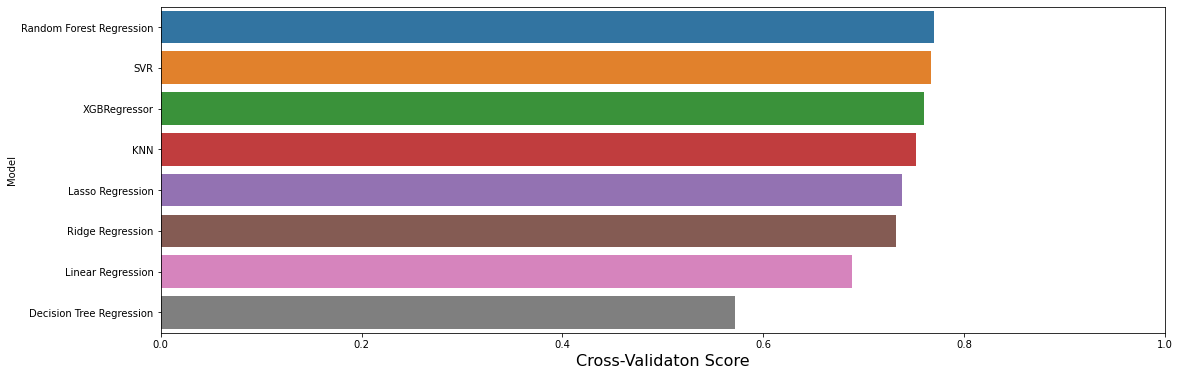

In [57]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

Cross validation score of Random Forest Regression is highest. SVR gives the second highest CV Score.

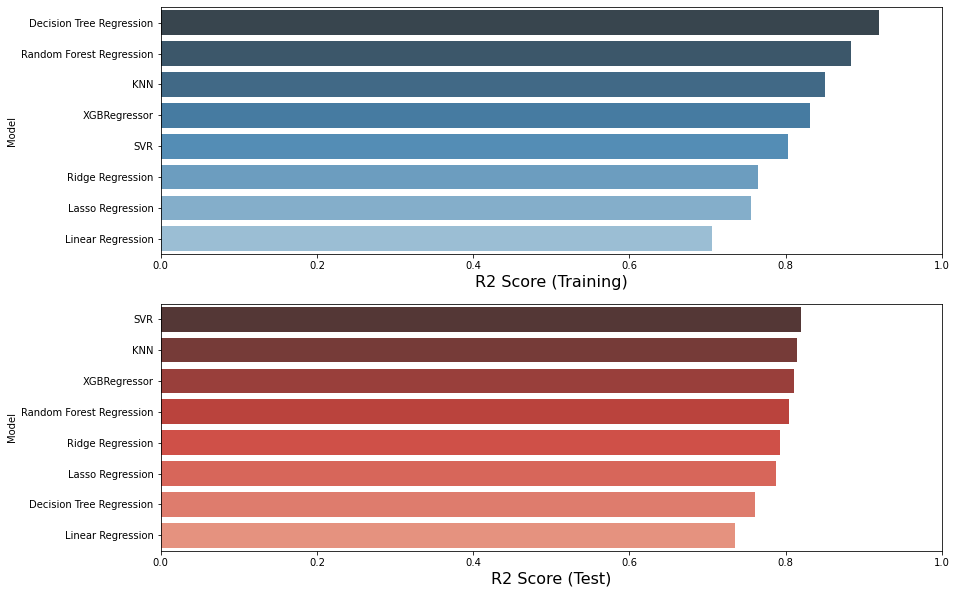

In [58]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

Decision Tree Regression gives highest R2 Score in Training and SVR gives highest R2 Score in Testing.

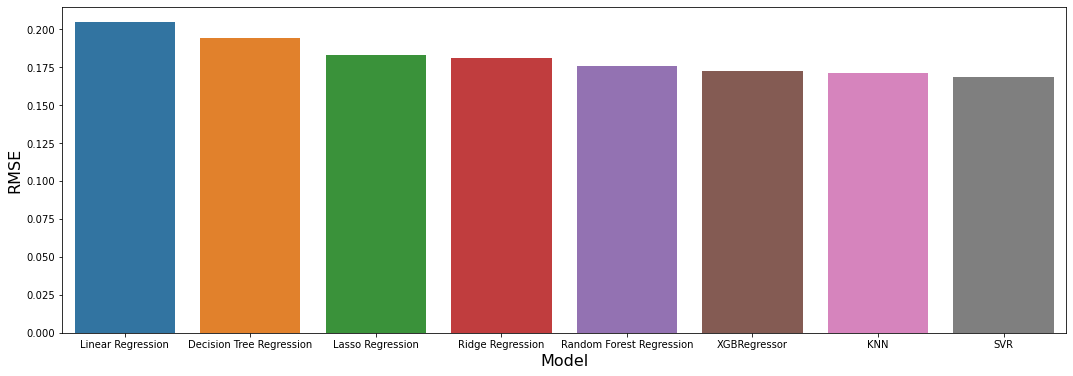

In [59]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()

SVR have the lowest Root Mean Squared Error While linear regression have highest RMSE.

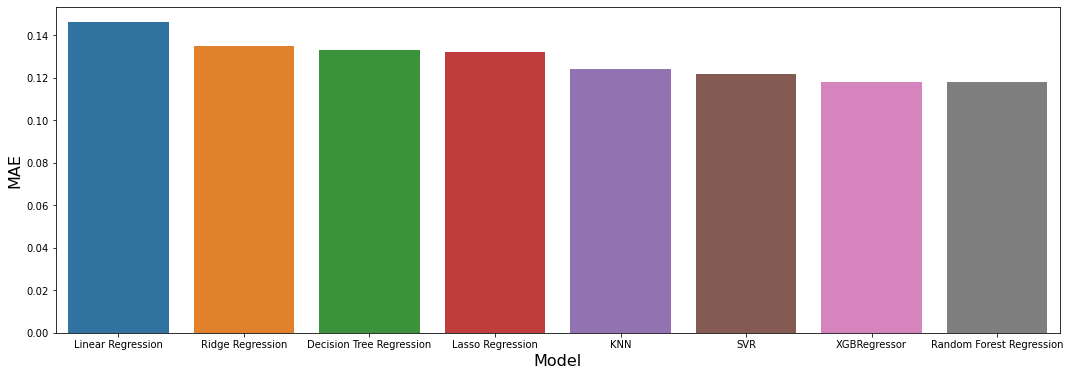

In [60]:
predict.sort_values(by=['MAE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='MAE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('MAE', size=16)

plt.show()

Random Forest Regression have the lowest Mean Absolute Error. While Linear Regression have highest MAE.

# Ensemble Method
 
A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction.

VotingRegressor is used to combine conceptually different machine learning regressors and return the average predicted values. Such a regressor can be useful for a set of equally well performing models in order to balance out their individual weaknesses. From my above models i will be applying VotingRegressor on SVR,KNN and Random Forest Regression because these three gave good results. 

CV:  0.7807735010559662
R2 score (Train): 0.8587294481018233
R2 score (Test): 0.831145913918918
Model Performance: 83.1145913918918
Mean Squared Error :  0.026621334417545515
Root Mean Squared Error :  0.1631604560472467
Mean Absolute Error :  0.11562858321424871


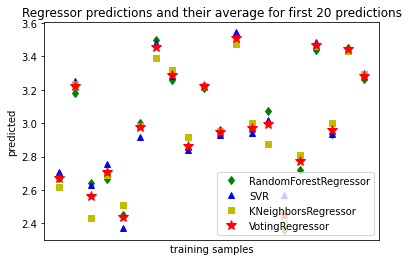


Scatter plot of y_test against y_pred using ensemble method:


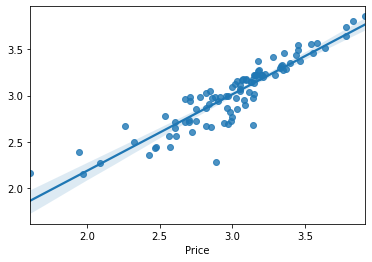

In [61]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score

r2 = RandomForestRegressor(max_depth=6, max_features=1, n_estimators=200)
r4 = SVR()
r7 = KNeighborsRegressor(n_neighbors=4)
en = VotingRegressor([ ('rf', r2),('sv', r4),('kn',r7)])

en.fit(X_train, y_train)
res=en.predict(X_test)

cv_en = cross_val_score(estimator = en, X = X_train, y = y_train, cv = 10,scoring='r2')
print("CV: ", cv_en.mean())

score_train_en = r2_score(y_train,en.predict(X_train))
print("R2 score (Train):",score_train_en)

score_test_en = r2_score(y_test, res)
print("R2 score (Test):",score_test_en)
print("Model Performance:",score_test_en*100)

mse_en = mean_squared_error(y_test, res)
print('Mean Squared Error : ',mse_en)
print('Root Mean Squared Error : ',np.sqrt(mse_en))

mae_en = mean_absolute_error(y_test,res)
print("Mean Absolute Error : ",mae_en)

# Now i will use each of the regressors to make the 20 first predictions and finally visualize the 20 predictions. 
# The red stars show the average prediction made by VotingRegressor.
xt = X_test[:20]
r2.fit(X_train, y_train)
r4.fit(X_train, y_train)
r7.fit(X_train, y_train)

pred1 = r2.predict(xt)
pred2 = r4.predict(xt)
pred3 = r7.predict(xt)
pred4 = en.predict(xt)

plt.figure()
plt.plot(pred1, 'gd', label='RandomForestRegressor')
plt.plot(pred2, 'b^', label='SVR')
plt.plot(pred3, 'ys', label='KNeighborsRegressor')
plt.plot(pred4, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average for first 20 predictions')

plt.show()

print('\nScatter plot of y_test against y_pred using ensemble method:')
sns.regplot(y_test, res);

Using Ensemble method R2-Score of 0.83 which is highest and RMSE of 0.16 which is lowest are achieved.

## Conclusion

In this project, I have built 8 regression models using Boston Housing Dataset. These are Linear, Ridge, Lasso, SVR, Decision Tree, KNeighborsRegressor, Random Forest Regressor and XGBRegressor. Then measured and visualized the performance of these models. After visualizing performance of these models i found that KNeighborsRegressor, XGBRegressor, SVR and Random forest Regressor performed the best then i applied voting ensemble machine learning model using KNeighborsRegressor, SVR and Random forest Regressor and found out that this ensemble method gives the best results.